In [57]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd 
sns.set()

In [58]:
df_abalone=pd.read_csv("abalone.csv")
df_abalone

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [65]:
x=df_abalone.iloc[:, :-1].values
y=df_abalone.iloc[: , 8].values

<Axes: >

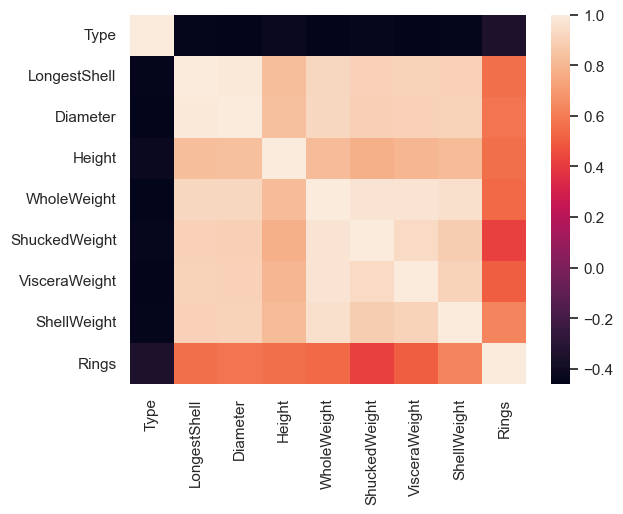

In [66]:
sns.heatmap(df_abalone.corr())

In [67]:
df_abalone["Type"]=df_abalone["Type"].map({'M':1,'F':2,"I":3})

In [68]:
x_new = sm.add_constant(x)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_new,y,test_size = 0.2 , random_state = 42)

In [70]:
model=sm.OLS(y_train,X_train) 

In [71]:
result=model.fit()

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     475.7
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:25:40   Log-Likelihood:                -7361.3
No. Observations:                3341   AIC:                         1.474e+04
Df Residuals:                    3332   BIC:                         1.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0623      0.339     11.986      0.000       3.398       4.727
x1            -0.3702      0.052     -7.145      0.000      -0.472      -0.269
x2            -0.6024      2.081     -0.290      0.772      -4.682       3.477
x3            11.9887      2.539      4.722      0.000       7.011      16.966
x4            10.7978      1.615      6.687      0.000       7.632      13.964
x5             8.9994      0.865     10.409      0.000       7.304      10.694
x6           -20.5241      0.966    -21.254      0.000     -22.417     -18.631
x7            -9.1865      1.468     -6.257      0.000     -12.065      -6.308
x8             8.7623      1.310      6.690      0.000       6.194      11.330
==============================================================================
Omnibus:                      755.530   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2247.338
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       6.280   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
y_predict=result.predict(X_test)
y_predict

array([11.87832964, 10.31216715, 13.8665945 , 11.83138703, 11.21298207,
       10.35199668,  9.52894756,  9.16178272,  7.2483362 , 10.6244662 ,
       12.05551795,  7.42348229, 12.10563453,  7.53803069,  8.26769902,
       13.15175184, 12.56254456, 11.53525463, 14.23560895,  8.85774785,
       18.3822421 ,  5.69480332, 11.4404373 , 11.48414403,  9.74623548,
        7.67921498,  9.82532468,  8.65293036, 10.01416655,  9.242593  ,
       10.48941216, 11.37844903,  7.25766376, 10.35985894,  8.90181023,
        9.25387813,  6.44706226,  4.31688673,  8.11881202,  7.13064761,
       12.02016161, 16.63129548, 12.82165241,  9.10210307, 11.61934694,
       11.1742938 ,  9.55133219,  9.35536664, 12.69090798,  5.45084363,
        6.88427411, 20.45065515,  9.73590934,  4.9699281 ,  6.73197643,
       10.37757115, 11.30535225, 14.50237484,  9.93150415,  7.99322855,
       11.83554177, 13.24143209, 10.57747477,  7.73757999,  7.60282989,
       10.94877796,  5.38152101,  6.97539583,  9.06359083, 12.12

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

ols_MSE = mean_squared_error(y_test,y_predict)
ols_MAE = mean_absolute_error(y_test,y_predict)
ols_R2_score = r2_score(y_test,y_predict)

ols_MSE,ols_MAE,ols_R2_score

(4.9503105029361905, 1.606760859825025, 0.5427053625654412)

In [75]:
r2_score(y_test,y_predict)

0.5427053625654412